# Prediction of diabetes onset in a group of Pima Indians
**Goal:** Create a Multilayer Perceptron to predict whether each recorded examinee is going to develop type 2 diabetes within 5 years of measurement. The program will sort the subjects into two classes: Those who are likely to develop diabetes, and those who are unlikely to do so.  

## Data
- **Pregnancy count (#):** Gestational diabetes, while generally temporary, increases the risk of type 2, a correlation shown to be even more prevalent among Native American groups. (nps.org.au/australian-prescriber/articles/drugs-for-gestational-diabetes)
- **Plasma glucose concentration (mg/dL):** Oral glucose tolerance test, data taken at the 2-hour mark after the ingestion of a sugar solution.
- **Diastolic blood pressure (mmHg):** Blood pressure in the heart's resting period, ie. between beats. A correlation between hypertension (high blood pressure) and diabetes has been found. (ahajournals.org/doi/10.1161/hypertensionaha.117.10546)
- **Triceps skinfold thickness (mm):** Diabetic cheiroarthropathy is a symptom of diabetes, which, among other conditions, describes an increase in skin thickness, showing a correlation. (ncbi.nlm.nih.gov/pmc/articles/PMC1339859/)
- **Blood insulin (μU/mL – specific unit based on bio-efficacy):** Measurement taken at the same time as the glucose factor.
- **Body-mass index (kg/m$^2$):** Considers body weight in proportion to height. 
- **Diabetes pedigree function:** Aggregates genetic data of family members to forecast the likelihood of diabetes development.
- **Age (years):** Another significant factor, the likelihood of diabetes increases proportionally with age.
- **Result (boolean):** Whether the examinee ended up developing type 2 diabetes within 5 years of measurement.

In [3]:
import pandas as pd
import numpy as np

In [4]:
pd.set_option("display.max_rows", None)
column_names = ["PregnancyCount", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DPF", "Age", "Result"]
data = pd.read_csv('pima-indians-diabetes.csv', names=column_names)
data.head()

,PregnancyCount,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Result
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Preprocessing
**Data rectification:** The data contains zero values in the Glucose, Blood pressure, Skin thickness, Insulin and BMI fields, which are physiologically impossible in a living human being, suggesting a lack of measured data. As such, the zero values of these fields will be replaced by the average of the values of their non-zero counterparts.

In [5]:
glucose_col_mean = round((data['Glucose'].loc[data['Glucose'] != 0]).mean())
blood_col_mean = round((data['BloodPressure'].loc[data['BloodPressure'] != 0]).mean())
skin_col_mean = round((data['SkinThickness'].loc[data['SkinThickness'] != 0]).mean())
insulin_col_mean = round((data['Insulin'].loc[data['Insulin'] != 0]).mean())
bmi_col_mean = round((data['BMI'].loc[data['BMI'] != 0]).mean(), 1)

print("Average glucose:", glucose_col_mean)
print("Average blood pressure:", blood_col_mean)
print("Average skin thickness:", skin_col_mean)
print("Average insulin:", insulin_col_mean)
print("Average BMI:", bmi_col_mean)

data["Glucose"].replace(to_replace = 0, value = glucose_col_mean, inplace=True)
data["BloodPressure"].replace(to_replace = 0, value = blood_col_mean, inplace=True)
data["SkinThickness"].replace(to_replace = 0, value = skin_col_mean, inplace=True)
data["Insulin"].replace(to_replace = 0, value = insulin_col_mean, inplace=True)
data["BMI"].replace(to_replace = 0, value = bmi_col_mean, inplace=True)
data.head()


Average glucose: 122
Average blood pressure: 72
Average skin thickness: 29
Average insulin: 156
Average BMI: 32.5


,PregnancyCount,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Result
0,6,148,72,35,156,33.6,0.627,50,1
1,1,85,66,29,156,26.6,0.351,31,0
2,8,183,64,29,156,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Separating the rectified data:** The dataframe needs to be fitted to our use, so the target values (i.e. the Result column) will be separated from the data matrix. 

In [6]:
X = data.loc[:, data.columns != 'Result']
y = data['Result']

print(f"Entries in data matrix: {X.shape[0]}, {'matching' if X.shape[0] == y.shape[0] else 'NOT matching'} that of the target.")

Entries in data matrix: 768, matching that of the target.


**Splitting the subsets for training and testing:** The dataframe needs to be fitted to our use, so the target values (i.e. the Result column) will be separated from the data matrix.

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=30, shuffle=True)

# MLP construction
**Parameterizing the network:** The first network will be a carbon copy of the one presented in class, with minimal alterations. This configuration does not suit the dataset particularly well, and as such, produces poor results.

In [8]:
from sklearn.neural_network import MLPClassifier

In [9]:
mlp_sgd = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, alpha=1e-4,
                    solver='sgd', verbose=10,activation='relu', random_state=1,
                    learning_rate_init=.1)

mlp_sgd.fit(X_train, y_train)
print("\nTraining complete.")

Iteration 1, loss = 9.18218948
Iteration 2, loss = 0.87079528
Iteration 3, loss = 1.08364771
Iteration 4, loss = 1.27615030
Iteration 5, loss = 1.42497552
Iteration 6, loss = 1.52879244
Iteration 7, loss = 1.59999342
Iteration 8, loss = 1.64604010
Iteration 9, loss = 1.68440446
Iteration 10, loss = 1.70569923
Iteration 11, loss = 1.71940217
Iteration 12, loss = 1.72844646
Iteration 13, loss = 1.73468834
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.

Training complete.


In [10]:
print("---SGD Algorithm---\n")
print(f"Training set score: {mlp_sgd.score(X_train, y_train)}")
print(f"Test set score:{mlp_sgd.score(X_test, y_test)}")

---SGD Algorithm---

Training set score: 0.6517615176151762
Test set score:0.6333333333333333


**Choosing another solver:** Due to our low sample size, neither the Stochastic Gradient Descent, nor the Adam solver produce outstanding results. The Limited Memory BFGS algorithm is said to provide superior performance on such, sets, so another network will be constructed to test that assumption. 

In [11]:
mlp_lbfgs = MLPClassifier(solver='lbfgs', alpha=1e-9, hidden_layer_sizes=(20, 4), 
                          random_state=1, max_iter = 5000)

mlp_lbfgs.fit(X_train, y_train)
print("\nTraining complete.")


Training complete.


In [12]:
print("---LBFGS Algorithm---\n")
print(f"Training set score: {mlp_lbfgs.score(X_train, y_train)}")
print(f"Test set score:{mlp_lbfgs.score(X_test, y_test)}")

---LBFGS Algorithm---

Training set score: 0.7981029810298103
Test set score:0.7333333333333333


**Comparing the solvers:** The performance of the solver depends greatly on the values assigned to the network on construction. However, after a little bit of manual testing, some trends can be noticed (see below image for details).

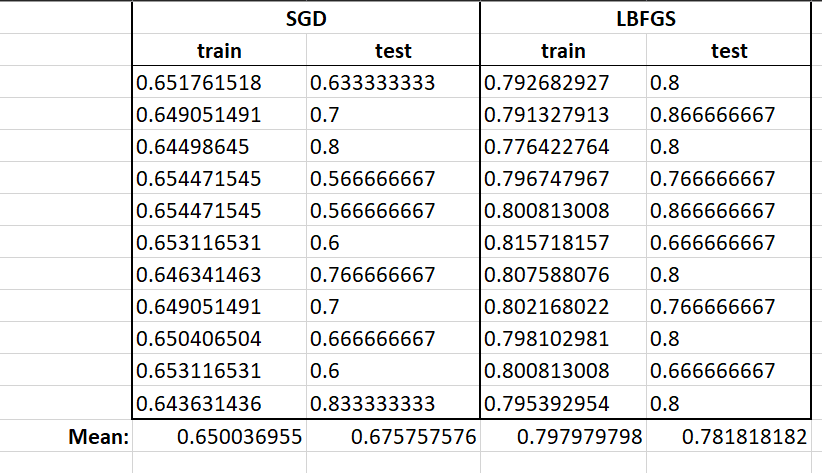

In [13]:
from IPython.display import Image
Image("tests.png")

Not only did the MLP using LBFGS generally outperform the SGD one, but it was also far more consistent in its behavior. 

In [14]:
y_pre = mlp_lbfgs.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pre)
print('Accuracy: %f' % accuracy)
for i in np.unique(y_test):
    ytest = []
    ypre = []
    for y in y_test:
        if (y == i):
            ytest.append(1)
        else:
            ytest.append(0)
    for y in y_pre:
        if (y == i):
            ypre.append(1)
        else:
            ypre.append(0)

Accuracy: 0.733333


In [15]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix


#precision tp / (tp + fp)
precision = precision_score(ytest, ypre)
print(f"{i} Precision: {precision}")
# recall: tp / (tp + fn)
recall = recall_score(ytest, ypre)
print(f"{i} Recall: {recall}")
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(ytest, ypre)
print(f"{i} F1 score: {f1}")
matrix = confusion_matrix(y_test, y_pre)
print(matrix)

1 Precision: 0.7142857142857143
1 Recall: 0.45454545454545453
1 F1 score: 0.5555555555555556
[[17  2]
 [ 6  5]]
